In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

#### Creation Of Tensors

In [2]:
string = tf.Variable("Hello world", tf.string)
number = tf.Variable(100,tf.int64)
float = tf.Variable(28.98, tf.float64)

#### Printing Tensors
float

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=28.98>

#### Rank/ Degree of Tensors

In [3]:
rank1_tensor = tf.Variable(["this is a string","tensorflow"],tf.string) 
rank2_tensor = tf.Variable([["hello","world"],["Welcome", "Deep Learning"]],tf.string)

# Output ranks for each sensor

print("Rank of string tensor:", tf.rank(string))
print("Rank of rank 1 tensor:", tf.rank(rank1_tensor))
print("Rank of rank 2 tensor:", tf.rank(rank2_tensor))

Rank of string tensor: tf.Tensor(0, shape=(), dtype=int32)
Rank of rank 1 tensor: tf.Tensor(1, shape=(), dtype=int32)
Rank of rank 2 tensor: tf.Tensor(2, shape=(), dtype=int32)


#### Shape of Tensors
Shape of a tensor is the amount of elements that exists in each dimensions

In [4]:
# Get the shape of the following tensors
print("Shape of float:",tf.shape(float))
print("Shape of rank1:",tf.shape(rank1_tensor))
print("Shape of Rank2 tensor:",tf.shape(rank2_tensor))


Shape of float: tf.Tensor([], shape=(0,), dtype=int32)
Shape of rank1: tf.Tensor([2], shape=(1,), dtype=int32)
Shape of Rank2 tensor: tf.Tensor([2 2], shape=(2,), dtype=int32)


#### Changing Shape
The number of elements of a tensor is the product of the size of all its shapes. There are often many shapes that have the same number of elements making it convenient to be able to change.

In [5]:
tensor1 = tf.ones([1,2,3]) # tf.ones() Create a [1,2,3] shape tensor full of ones
tensor1

<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [6]:
# Reshape tensor1 to 2,3,1

tensor2 = tf.reshape(tensor1,[2,3,1])
tensor2

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]], dtype=float32)>

In [7]:
tensor3 = tf.reshape(tensor2,[3,-1])
tensor3

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

#### Types of Tensors
- Variable
- Constant
- Placeholder
- SparseTensor

In [8]:
# Working on Tensor Reshaping
t = tf.zeros([5,5,5,5])
# Reshape
t1 = tf.reshape(t,[125,-1])
t1

<tf.Tensor: shape=(125, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0.

#### Tensor Core Learning Algorithms
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

#### Training A Linear Regression Model


In [9]:
# # Load dataset.
train_df = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
eval_df = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')

In [10]:
train_df.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


### Features

In [12]:
categorical_columns = ['sex','class', 'deck',
                       'embark_town', 'alone']
numeric_columns = ['age', 'fare','n_siblings_spouses', 'parch' ]



#### Step 3 Preprocessing the Data
3.1 Preprocess Numerical Features
For the Numeric columns, we need to normalize them to have a mean of 0 and a standard deviation of 1.


In [13]:
feature_columns = []

for feature_name in categorical_columns:
    vocabulary = train_df[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


#### Create Input Function

In [14]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
    

train_ds = make_input_fn(train_df, y_train)
eval_ds = make_input_fn(eval_df,y_eval,num_epochs=1,shuffle=False)

In [15]:
# Inspect Dataset
ds = make_input_fn(train_df,y_train,batch_size=10)
for feature_batch, label_batch in ds.take(1):
    print("Some Feature Keys:", list(feature_batch.keys()))
    print()
    print("A Batch of Labels:", feature_batch["class"].numpy())
    print()
    print("A Batch of Labels:", label_batch.numpy())

Some Feature Keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

A Batch of Labels: [b'Second' b'Third' b'Second' b'Second' b'Third' b'Third' b'Second'
 b'Third' b'Second' b'Second']

A Batch of Labels: [1 1 1 1 0 0 0 0 1 0]


In [16]:
# Inspecting age columns with keras layers
age_column = feature_columns[5]
# Create a Keras Input layer for the feature
age_input = tf.keras.Input(shape=(1,), name='age')

# Create a Keras Dense layer for the age

age_dense = tf.keras.layers.Dense(64, activation='relu')(age_input)
age_dense

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor>

#### Preprocess Data and Train Model 

In [17]:
# Define the input layers for each feature
inputs = {
    'sex': tf.keras.layers.Input(name='sex', shape=(), dtype=tf.string),
    'age': tf.keras.layers.Input(name='age', shape=(), dtype=tf.float32),
    'n_siblings_spouses': tf.keras.layers.Input(name='n_siblings_spouses', shape=(), dtype=tf.int64),
    'parch': tf.keras.layers.Input(name='parch', shape=(), dtype=tf.int64),
    'fare': tf.keras.layers.Input(name='fare', shape=(), dtype=tf.float32),
    'class': tf.keras.layers.Input(name='class', shape=(), dtype=tf.string),
    'deck': tf.keras.layers.Input(name='deck', shape=(), dtype=tf.string),
    'embark_town': tf.keras.layers.Input(name='embark_town', shape=(), dtype=tf.string),
    'alone': tf.keras.layers.Input(name='alone', shape=(), dtype=tf.string),
}

# Custom layer to expand dimensions
class ExpandDimsLayer(layers.Layer):
    def call(self,inputs):
        return tf.expand_dims(inputs, -1)

# Create a list of expanded numeric features
expanded_numeric_features = [ExpandDimsLayer()(inputs['age']),
                             ExpandDimsLayer()(inputs['n_siblings_spouses']),
                             ExpandDimsLayer()(inputs['parch']),
                             ExpandDimsLayer()(inputs['fare'])]

# Concatenate the expanded numeric features
x = tf.keras.layers.concatenate(expanded_numeric_features)


# Add a Dense layer
x = tf.keras.layers.Dense(128,activation='relu')(x)

# Output layer
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)


# Define the model
model = tf.keras.Model(inputs=inputs, outputs=output)


# Compile the model
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_ds, epochs=10)



Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6360 - loss: 2.1791
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - loss: 0.6078
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 0.6007
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.5940
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7024 - loss: 0.5925
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - loss: 0.5881
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - loss: 0.5848
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7107 - loss: 0.5800
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7169 - loss: 0.5794
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7116 - loss: 0.5810


In [18]:
# Evaluate the model
model.evaluate(eval_ds,return_dict=True)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6629 - loss: 0.6374  


{'accuracy': 0.7121211886405945, 'loss': 0.5903809070587158}

#### Classification In Tensorflow

#### Load Data

In [19]:
iris_data = pd.read_csv("./data/iris_extended.csv")
# load first five rows
iris_data.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


#### Perform Brief EDA

In [20]:
# Check the last five rows
iris_data.tail(5)

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
1195,virginica,268.8,loamy,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,...,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,virginica,125.4,clay,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,...,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,virginica,73.6,clay,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,...,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,virginica,239.6,sandy,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,...,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873
1199,virginica,201.5,loamy,5.16,3.20,5.64,1.43,16.5120,8.0652,1.612500,...,0.914894,2.237762,-0.48,1.77,12.09,8.59,64.31,4.063496,2.839930,2.047314


In [21]:
iris_data.columns

Index(['species', 'elevation', 'soil_type', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'sepal_area', 'petal_area',
       'sepal_aspect_ratio', 'petal_aspect_ratio',
       'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio',
       'sepal_petal_length_diff', 'sepal_petal_width_diff',
       'petal_curvature_mm', 'petal_texture_trichomes_per_mm2',
       'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios'],
      dtype='object')

In [22]:
iris_data.shape

(1200, 21)

In [23]:
# Perform Descriptive Stats On Data
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,1200.0,173.543917,72.461258,50.100000,110.875000,171.300000,239.125000,299.900000
sepal_length,1200.0,5.895900,0.845579,4.040000,5.210000,5.840000,6.520000,9.120000
sepal_width,1200.0,3.052858,0.527120,1.700000,2.690000,3.030000,3.390000,4.760000
petal_length,1200.0,3.807950,1.765469,0.960000,1.640000,4.300000,5.200000,7.840000
petal_width,1200.0,1.189542,0.728882,0.050000,0.360000,1.290000,1.740000,2.990000
sepal_area,1200.0,17.870807,3.388978,9.048000,15.554550,17.646400,20.007275,29.722600
petal_area,1200.0,5.689068,4.585312,0.086000,0.565825,5.525400,9.256725,23.128000
sepal_aspect_ratio,1200.0,2.003853,0.507508,0.978774,1.639104,1.970738,2.293932,4.082902
petal_aspect_ratio,1200.0,4.016732,2.070668,1.587379,2.855016,3.448642,4.486058,34.400000
sepal_to_petal_length_ratio,1200.0,1.996762,1.035622,0.745902,1.223277,1.442773,3.059940,5.410000


In [24]:
# check the info of the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [25]:
# check for null values
iris_data.isna().sum()

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [26]:
# check for duplicates
iris_data.duplicated().sum()

0

#### Univariate Analysis

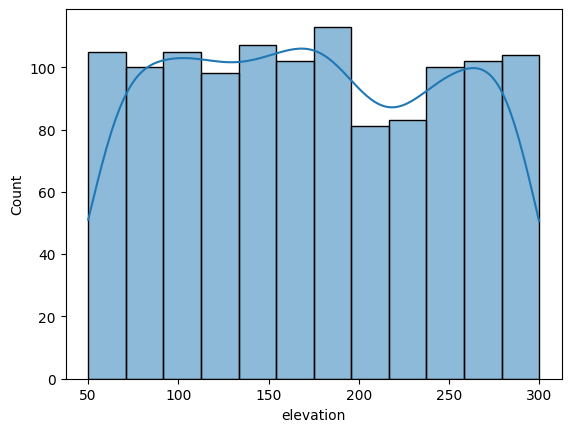

In [27]:
# Check Distribution of Elevation
sns.histplot(iris_data['elevation'], kde=True)
plt.show()

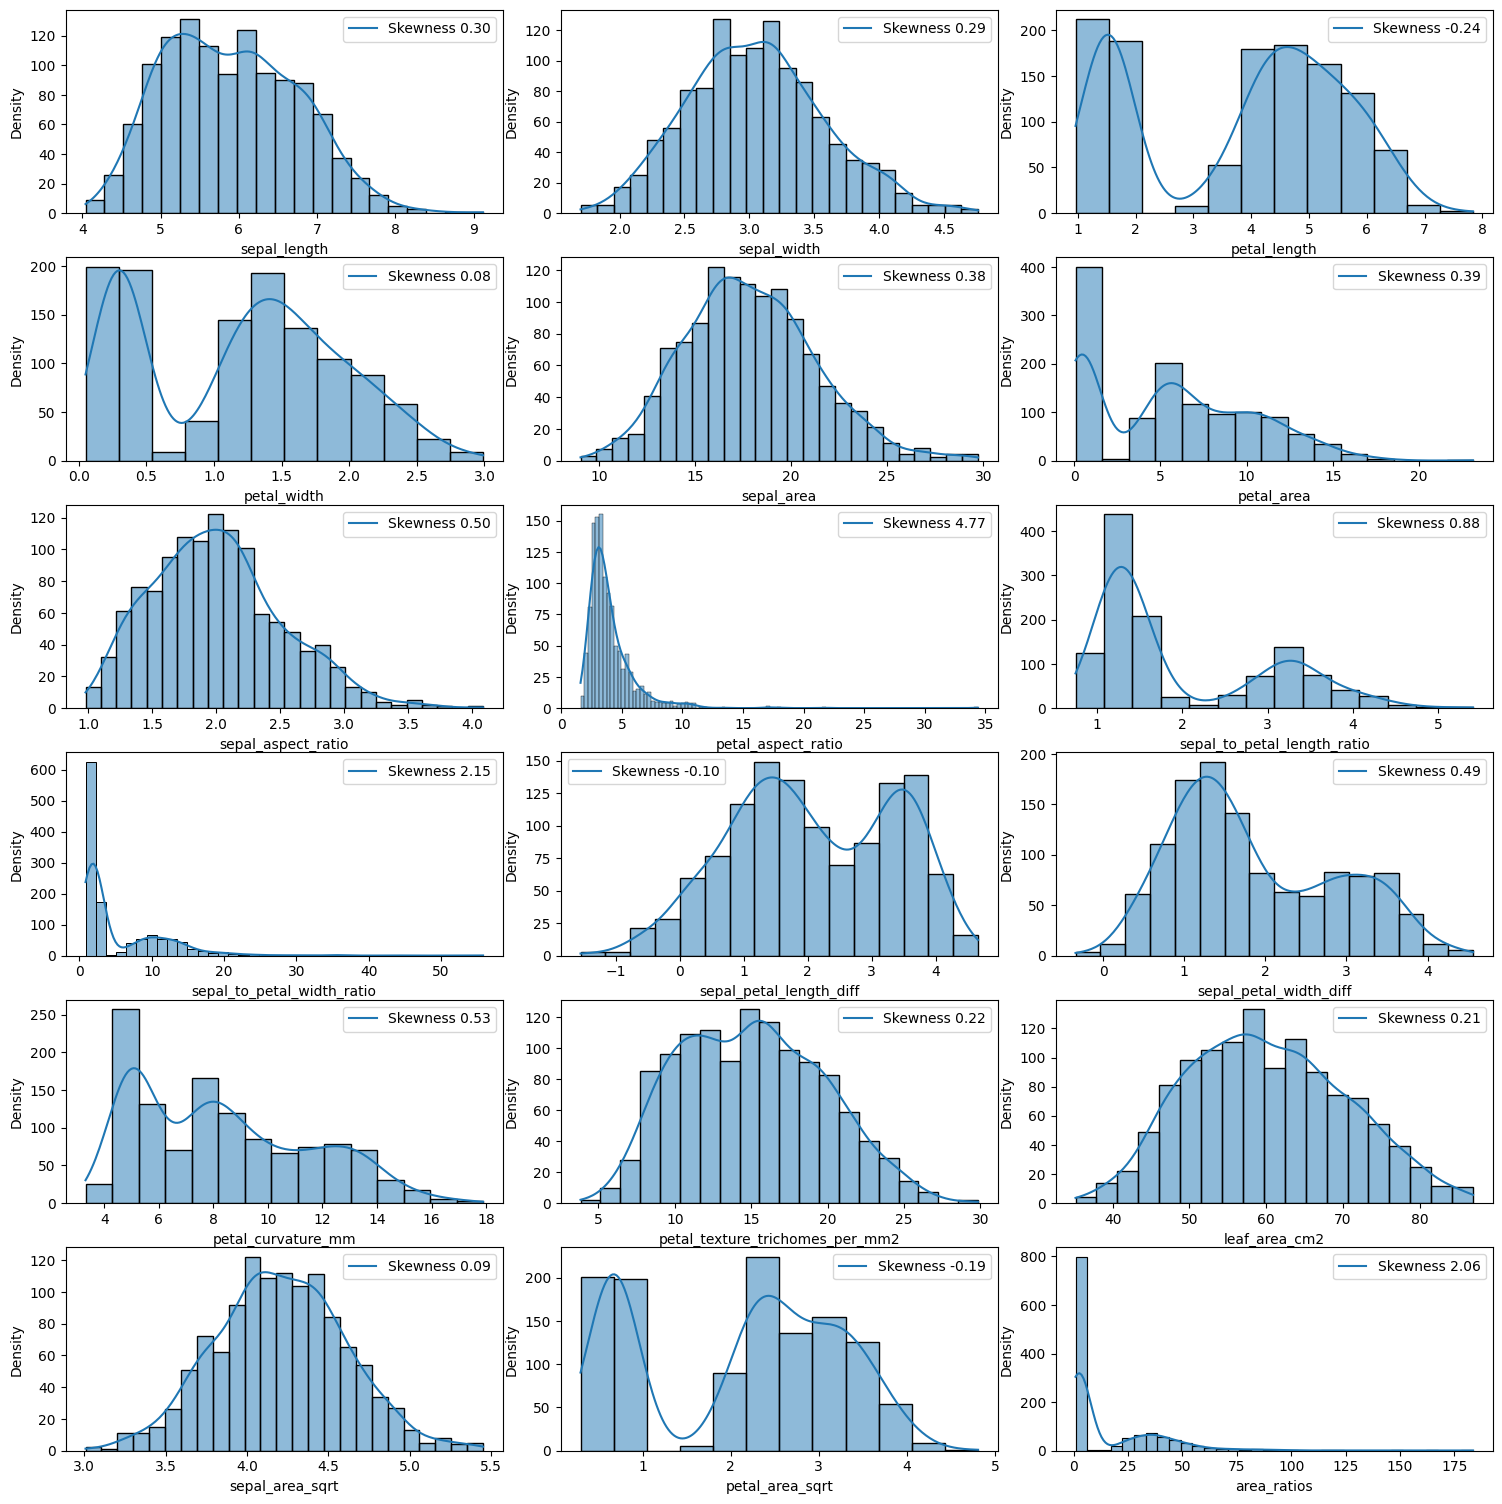

In [28]:
# Drop elevation Column
iris_copy = iris_data.copy()
iris_copy.drop(columns=['elevation'],inplace=True)

# Filter the columns to only include int and float types
numeric_columns = iris_copy .select_dtypes(include=['float64']).columns
# set the number of rows and columns for subplot
num_rows, num_columns = 6,3
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(numeric_columns):
    sns.histplot(iris_copy[column], ax=axes[id], kde=True)
    skewness = iris_copy[column].skew()
    axes[id].legend([f"Skewness {skewness:.2f}"])
    axes[id].set_ylabel("Density")
plt.show()


#### Check Out For Outliers

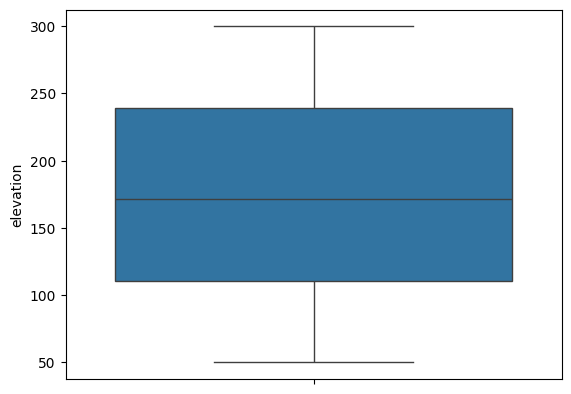

In [29]:
# Box Plot of Elevation
sns.boxplot(iris_data['elevation'])
plt.show()

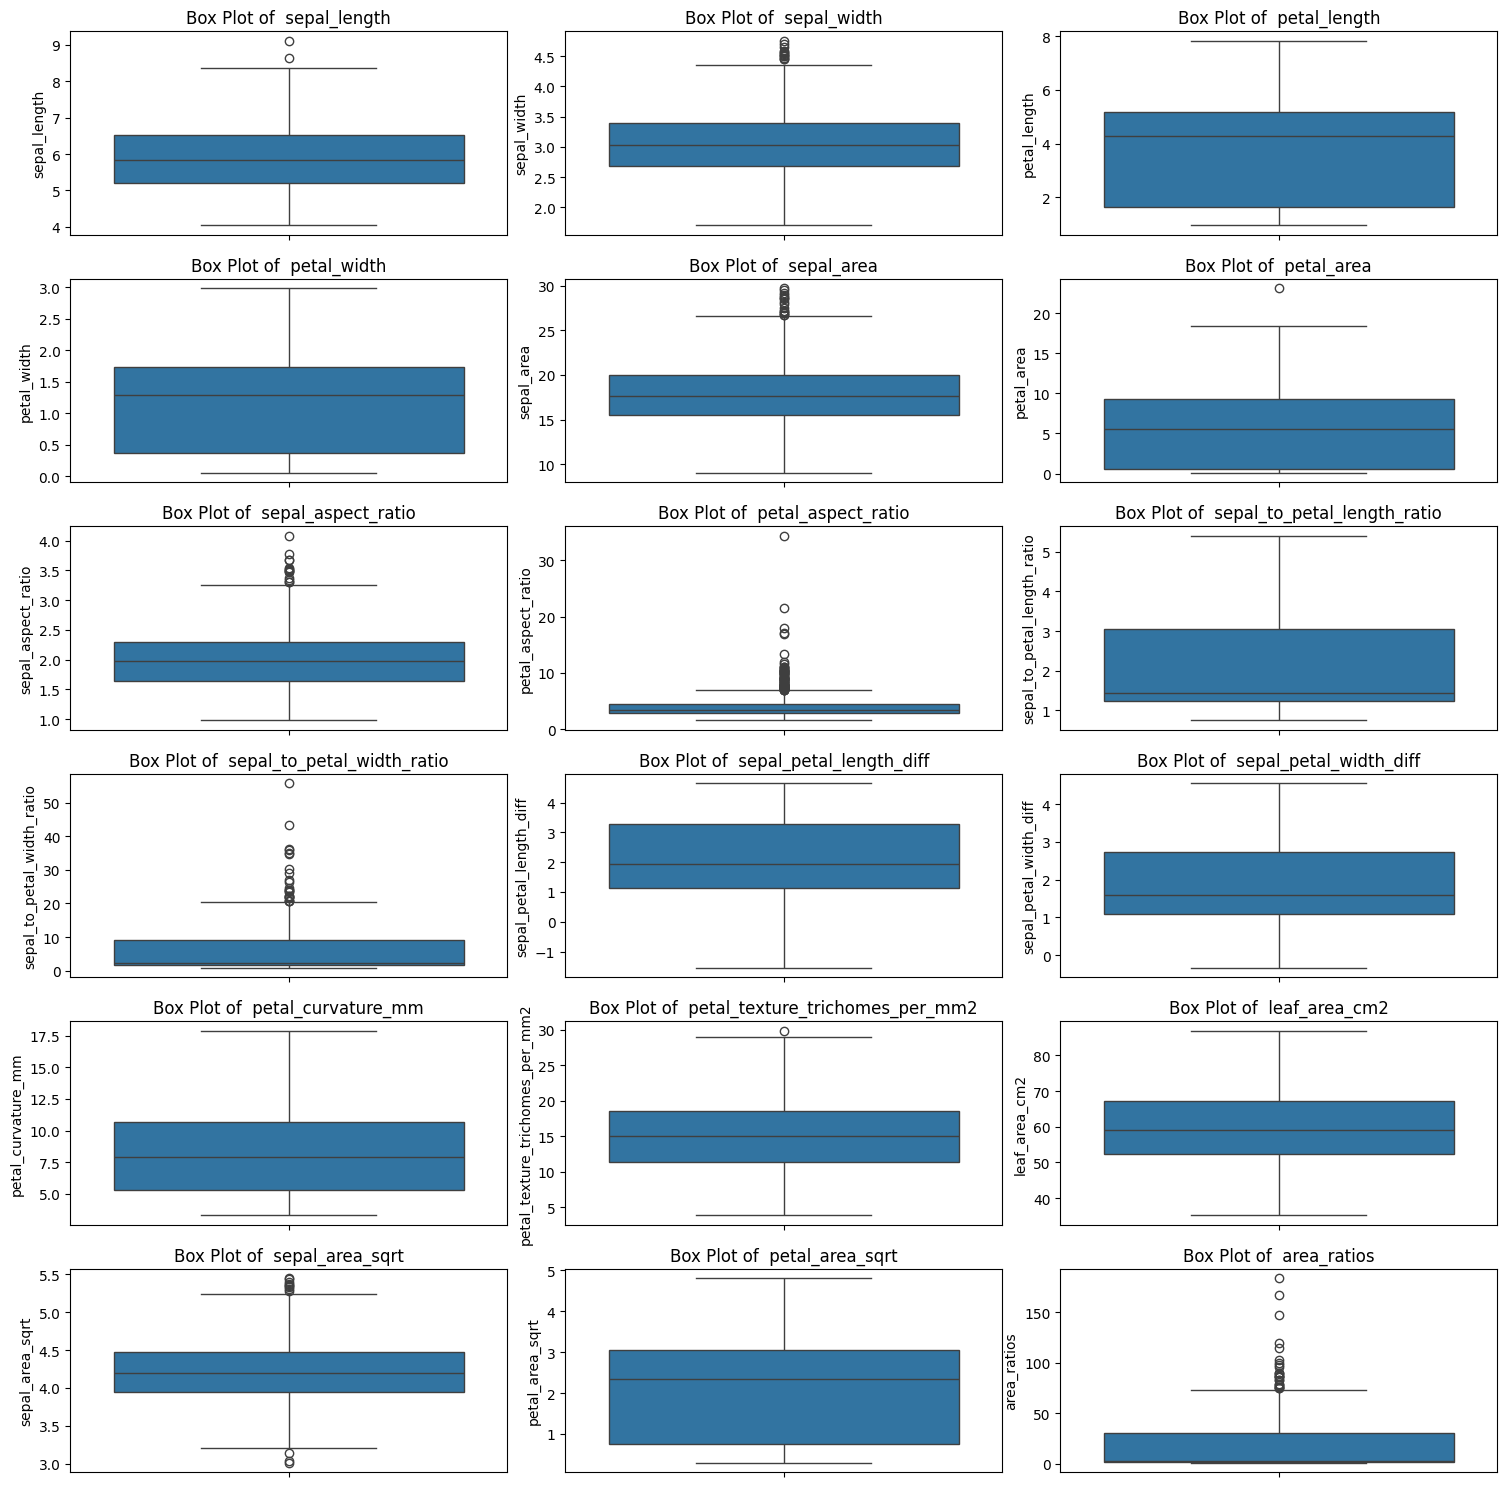

In [30]:
# Drop elevation Column
iris_data.drop(columns=['elevation'],inplace=True)
# Filter the columns to only include int and float types
numeric_columns = iris_data.select_dtypes(include=['float64']).columns
# set the number of rows and columns for subplot
num_rows, num_columns = 6,3
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(numeric_columns):
    sns.boxplot(iris_data[column], ax=axes[id])
    axes[id].set_title(f"Box Plot of  {column}")
plt.show()


There is the presence of Outliers In The Columns which will be catered for in the preprocessing stage.

#### Dealing With Outliers

In [31]:
def trim_outliers (df:pd.DataFrame):
    for col in df.select_dtypes(include=[np.number]).columns: ### Apply trimming
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Apply trimming on outliers
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

In [32]:
iris_data = trim_outliers(iris_data)

#### Confirm Outlier Removal

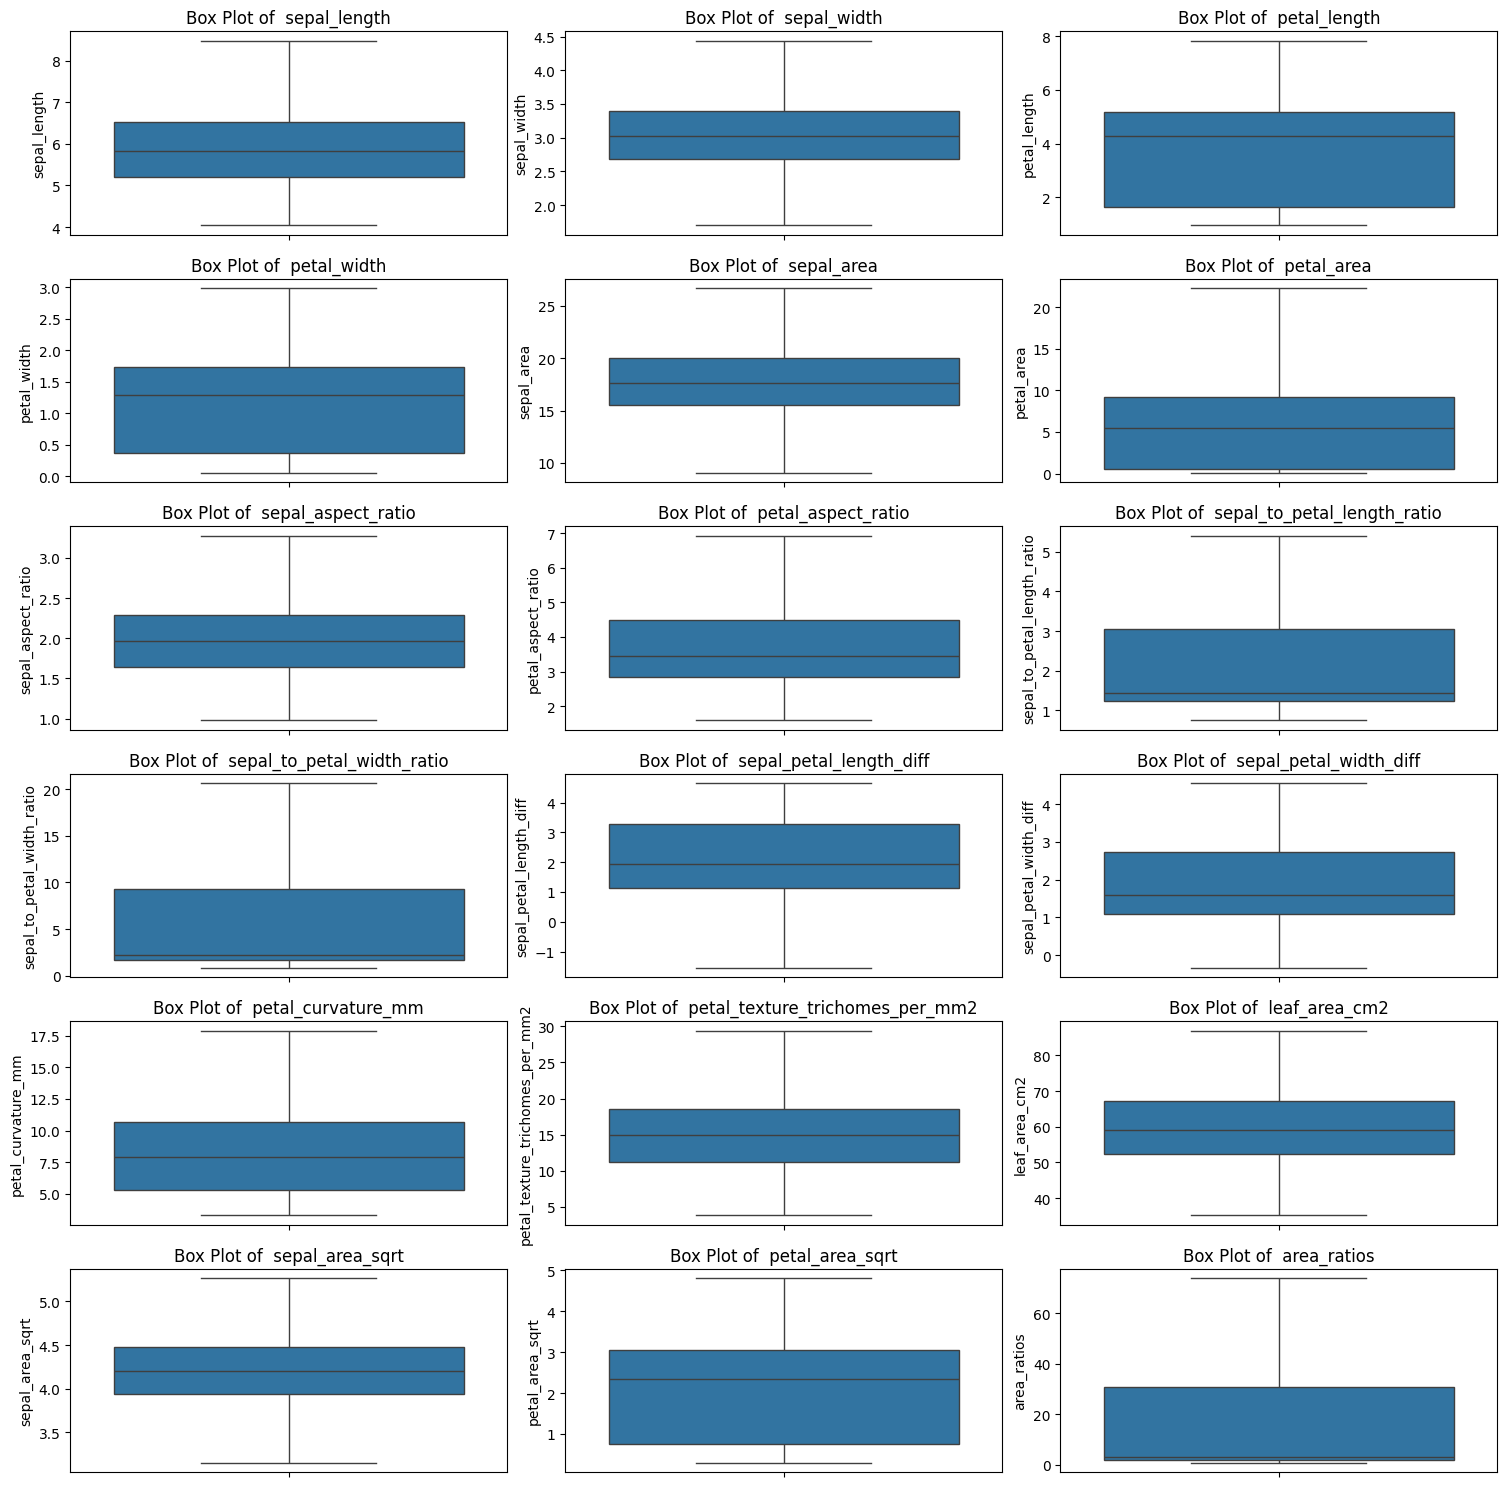

In [33]:
# Filter the columns to only include int and float types
numeric_columns = iris_data.select_dtypes(include=['float64']).columns
# set the number of rows and columns for subplot
num_rows, num_columns = 6,3
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(numeric_columns):
    sns.boxplot(iris_data[column], ax=axes[id])
    axes[id].set_title(f"Box Plot of  {column}")
plt.show()


#### Perform Phik Correlation Matrix 

interval columns not set, guessing: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios']


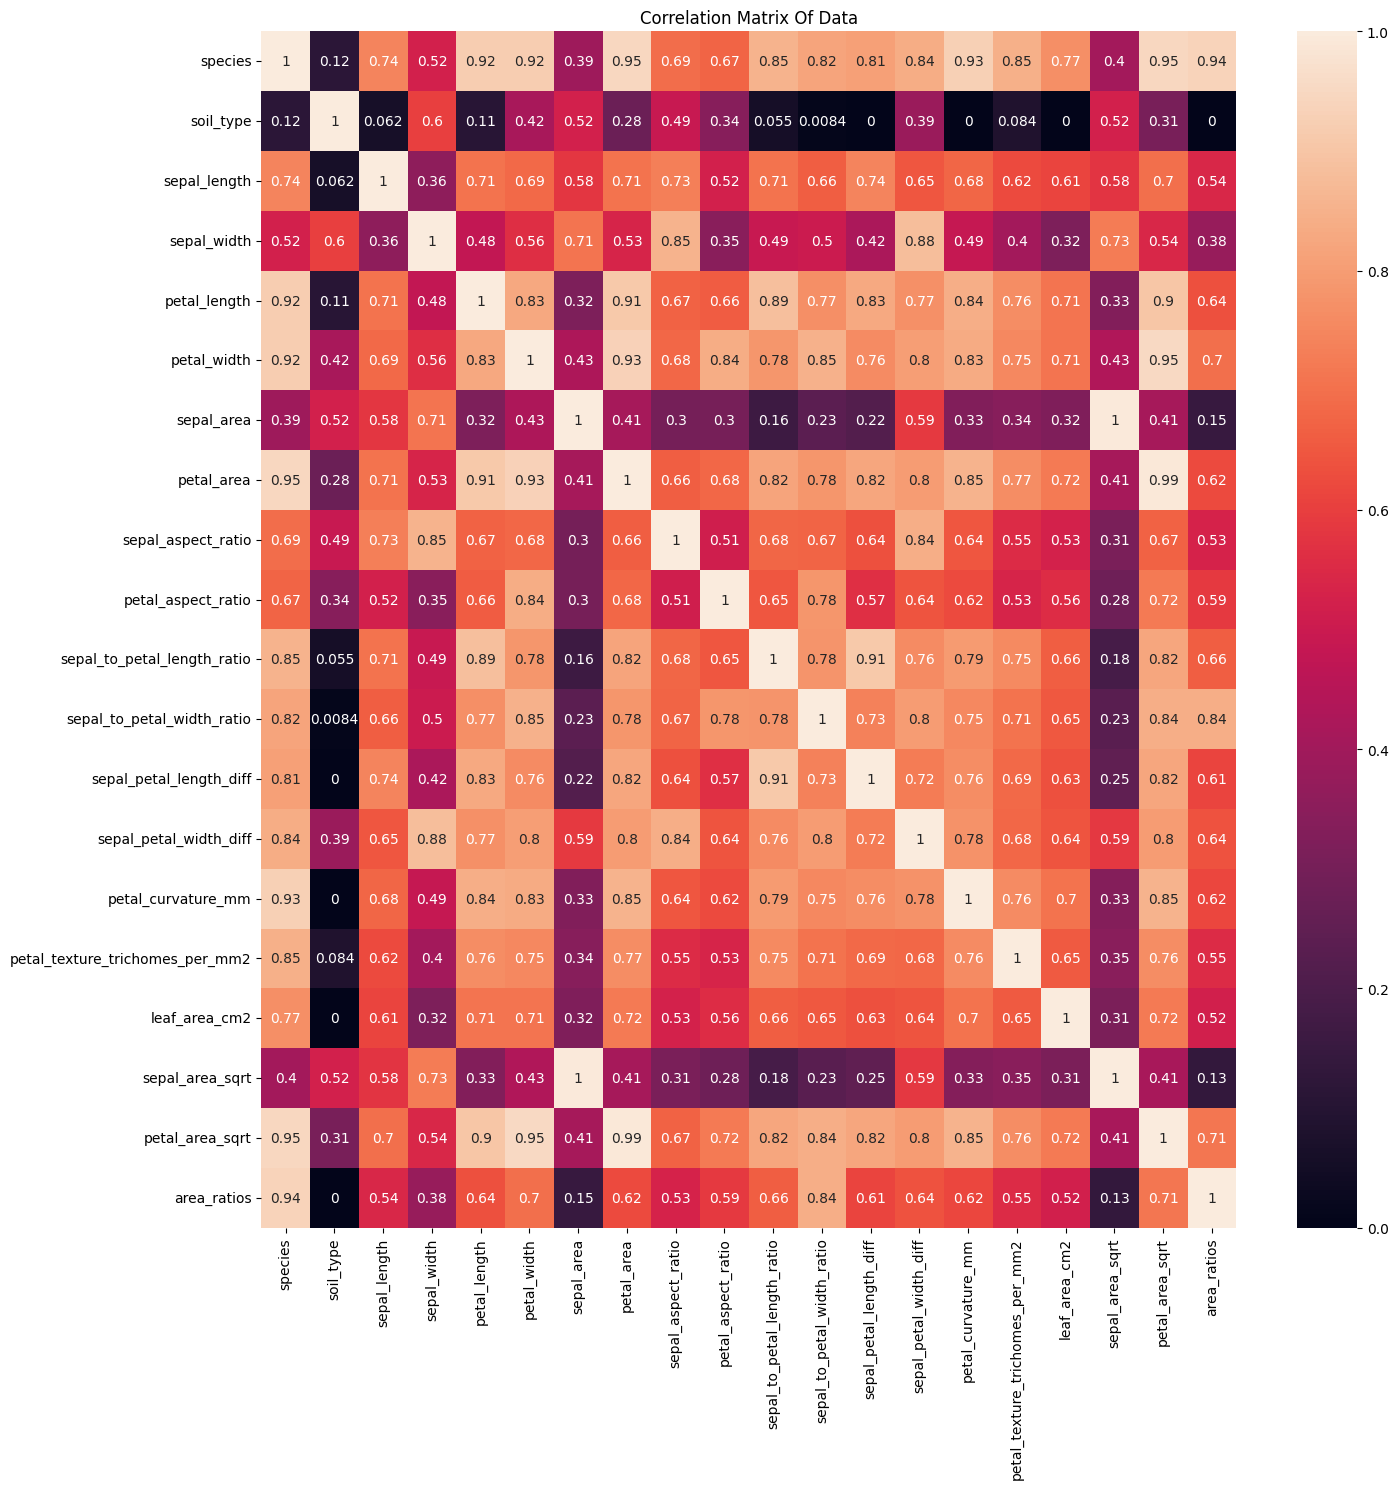

In [34]:
corr_matrix = iris_data.phik_matrix()
# set figure size
plt.figure(figsize=(15,15))
# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Of Data")
plt.tight_layout()
plt.show()

## Data Preprocessing

#### Split Data Into Features and Target

In [35]:
X = iris_data.drop(columns= ['species'])
y = iris_data['species']

In [36]:
numerical_features = X.select_dtypes(include=["int64","float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [37]:
X.head()

,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,6.932622,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [38]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

#### Train Test Split

In [39]:
X_train,X_test,y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y, random_state=42)


In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (960, 19)
X_test shape: (240, 19)
y_train shape: (960,)
y_test shape: (240,)


#### Encode Target Variable

In [41]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### Preprocessing Pipeline

In [42]:
num_pipeline = Pipeline(
    steps = [
        ("num_imputer",SimpleImputer(strategy="median")),
        # ("log_transformer",FunctionTransformer(np.log1p)),
        ("num_scaler",StandardScaler())
    ]
)

cat_pipeline = Pipeline (
    steps = [
        ("cat_imputer",SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features)
    ],
    remainder="passthrough" 
)

In [43]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### Model Training

In [44]:
early_stopping = EarlyStopping(
    min_delta = 0.001, #minimum amount of change to count as an improvement
    patience = 10,
    restore_best_weights = True
)

In [45]:
input_shape = X_train_preprocessed.shape[1]
model = keras.Sequential(
    [   layers.BatchNormalization(input_shape=[input_shape]),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1,activation="sigmoid")
    ]
)

In [46]:
# Compile model
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5239 - loss: -0.3154 - val_accuracy: 0.6542 - val_loss: -2.4611
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6206 - loss: -7.4825 - val_accuracy: 0.5833 - val_loss: -19.5846
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5392 - loss: -29.7554 - val_accuracy: 0.4458 - val_loss: -62.2298
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4372 - loss: -78.8658 - val_accuracy: 0.4417 - val_loss: -136.4307
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4671 - loss: -160.7281 - val_accuracy: 0.4125 - val_loss: -251.7623
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4174 - loss: -282.3170 - val_accuracy: 0.3542 - val_loss: -396.6198
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3555 - loss: -435.5307 - val_accuracy: 0.4583 - val_loss: -597.0640
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3573 - loss: -671.190

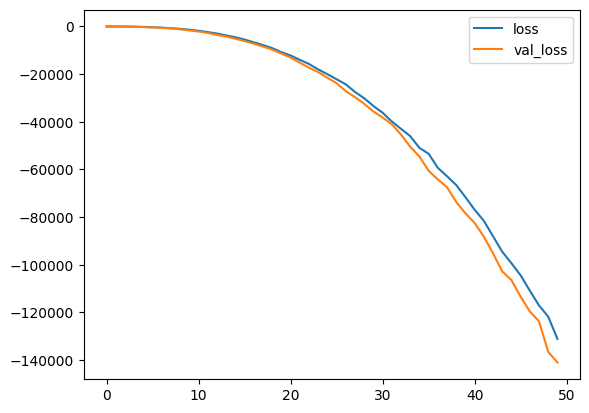

In [47]:
prediction = model.fit(
    X_train_preprocessed,
    y_train_encoded,
    validation_data=(X_test_preprocessed, y_test_encoded),
    epochs=50,
    callbacks=[early_stopping]
)

prediction_df = pd.DataFrame(prediction.history)
prediction_df.loc[:,['loss','val_loss']].plot();
print("Minimum Validation loss: {}".format(prediction_df['val_loss'].min()))

#### Hidden Markov Models For Weather Predictions
The Hidden Markov model is a finite set of states which is associated with a (generally multidimensional) probability distribution.Transitionns among states are governed by a set of probabilities called **transition probabilities**.

To create a hidden markov model we need:
1. States: The set of possible states the system can be in.
2. Observations: The set of possible observations the system can emit.
3. Transition probabilities: The probability of moving from one state to another.

In [48]:
import tensorflow_probability as tfp

In [49]:
tfd = tfp.distributions # initialize distributions
initial_distribution = tfd.Categorical(probs=[0.8,0.2])
transition_distribution = tfd.Categorical(probs=[[0.7,0.3],
                                          [0.8,0.2]])
observation_distribution = tfd.Normal(loc=[0.,15.],scale=[5., 10.])


In [50]:
# Create the model
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7,
)

In [51]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[3.        4.2       4.08      4.0919995 4.0907993 4.090919  4.090907 ]


#### Building Neural Network With The Fashion Mnist Dataset
The fashion_mnist dataset consists of 60,000 images for training and 10,000 images for validation/testing

In [52]:
fashion_mnist = keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split data into training and testing data

In [53]:
# check the shape of the train_images
train_images.shape

(60000, 28, 28)

We have 60,000 images with 28x28 pixels (784 in total)


In [54]:
train_images[0,23,23]

194

Our Pixel values are between 0 and 255, 0 being black and 255 being white. This means we have grayscale images as there are no color

In [55]:
train_labels[:10] #let's have a look at the first train labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our train labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We will create a an array of label names to indicate them.

In [56]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
               'Bag','Ankle boot']

#### Looking At Some Images

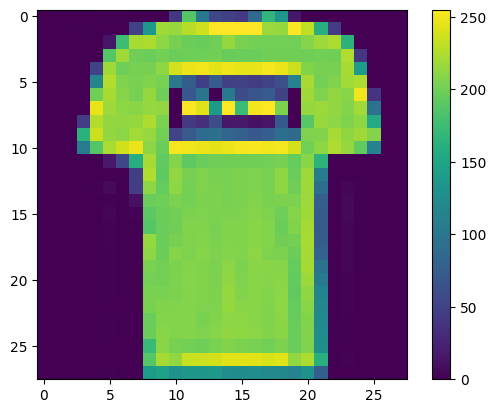

In [57]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#### Data Preprocessing
The next stage before building our deep learning model is the preprocessing stage.This simply means applying some transformations on our data before feeding it to the model. In this case, we will simply scale all our greyscale pixel values(0-255) to be between 0 and 1. We can do this by dividing each value in the dataset by 255.

In [58]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [59]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

#### Building the Model
Now we are going to build our keras sequential model with 3 different layers. This model represents feed-forward

In [60]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)), #input layer
        keras.layers.Dense(128, activation='relu'), #hidden layer 1
        keras.layers.Dense(10, activation='softmax') #output layer
    ]
)

#### Compile the Model
The last step in building a model is to define the loss function, optimizer and metrics we would track

In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

#### Training the Model

In [62]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7836 - loss: 0.6253
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8638 - loss: 0.3764
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8774 - loss: 0.3406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8842 - loss: 0.3132
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8889 - loss: 0.2991
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 0.2764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9029 - loss: 0.2645
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.2567
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.2464
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9128 - loss: 0.2356


#### Evaluating the Model on the Testing Data

In [63]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose=1)

print('\nTest accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8785 - loss: 0.3323

Test accuracy: 0.8756999969482422


#### Make Predictions

In [64]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1.6558387e-06 3.8189492e-09 7.0760104e-09 2.9500267e-11 1.0919619e-08
 1.4647593e-04 4.3691094e-07 2.7781634e-03 8.3771248e-09 9.9707329e-01]


In [65]:
# Print the class name of first prediction
print(np.argmax(predictions[0]))

9


In [66]:
# Output the actual class name 
print(class_names[np.argmax(predictions[0])])

Ankle boot


#### Check the image of the prediction


Bag


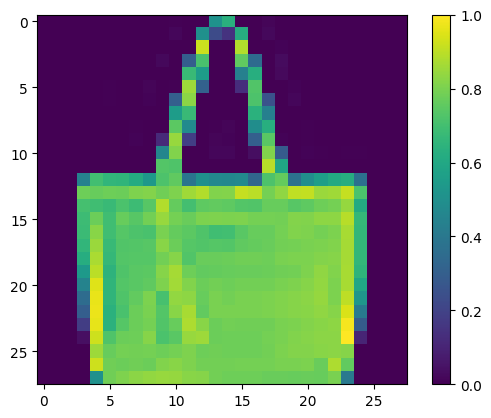

In [67]:
plt.figure()
print(class_names[np.argmax(predictions[900])])
plt.imshow(test_images[900])
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
# # Create a function to verify predictions
# def verify_predictions(predictions, test_images, test_labels):
#     class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
#     # Get the guess from the user
#     guess = int(input("Guess a number to see prediction (0 to {}): ".format(len(test_images) - 1)))
#     # Validate the input
#     if guess < 0 or guess >= len(test_images):
#         print("Invalid guess. Please enter a number between 0 and {}.".format(len(test_images) - 1))
#     else:
#         # Get predicted and actual class
#         pred_value = np.argmax(predictions[guess])
#         print(pred_value)
#         actual_class = np.argmax(test_labels[guess])
#         print(actual_class) 
        
#         # Print predicted and actual class
#         print(f"The predicted class is: {class_names[pred_value]}")
#         print(f"The actual class is: {class_names[actual_class]}")
        
#         # Plot the image
#         plt.imshow(test_images[guess], cmap='gray')
#         plt.colorbar()
#         plt.grid(False)
#         plt.show()
#     return None

# # Example usage (ensure predictions, test_images, and test_labels are defined correctly)
# # predictions = model.predict(test_images)
# verify_predictions(predictions, test_images, test_labels)


In [69]:
# # Create a function to verify predictions

# def verify_predictions(prediction,test_images,targets):
#     class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
#                'Bag','Ankle boot']
#     guess = int(input("Guess a number to see prediction:".format(len(test_images)-1)))

#     # Verify if guess falls within the range of test_images
#     if guess < 0 or guess > len(test_images - 1):
#         print("Invalid guess. Please enter a number between 0 and {}.".format(len(test_images)-1))
#         return 
#     else:
#         # Get Predicted and actual class values 
#         pred_value = np.argmax(prediction[guess])
#         actual_class = np.argmax(targets[guess])
#         print(f"The predicted class is: {class_names[pred_value]}")
#         plt.imshow(test_images[guess])
#         plt.colorbar()
#         plt.grid(False)
#         plt.show()
#         print(f"The actual class is: {class_names[actual_class[guess]]}")

# predictions = model.predict(test_images)
# verify_predictions(predictions,test_images,test_labels)